In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import tensorflow as tf
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE 
import seaborn as sn
''''from xgboost import XGBRegressor'''
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.1f}'.format

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")
'''
V1 cat. 0/1
V3 float 0 1000
V4 int 0 15000
V5 0 a 11 talvez cat
V6 cat 0/1
V7 float generico parece ser a produção
V9 e V9  e V10 cat 0/1
Safra anomes
'''
df_crop = pd.read_csv('dataset_test_ds.csv',delimiter=';')

# Matriz de correlação

corrMatrix = df_crop.corr(method='spearman')
corrMatrix.sort_values('TARGET',inplace=True, ascending=False)
colu = corrMatrix.index
plt.figure(figsize=(20,10))
sn.set(font_scale=1)
sn.heatmap(corrMatrix[colu], annot=True,cmap='Oranges')



plt.show()

In [ ]:
corrMatrix.columns

In [ ]:
df_crop.shape

In [ ]:
df_crop

In [ ]:
df_crop.describe()

In [ ]:
df_crop.V10.value_counts()

In [ ]:
df_crop.shape

In [ ]:
df_crop.isna().sum()


In [ ]:
df_crop.info()

In [ ]:
df_crop['Safra'].value_counts()

In [ ]:
df_crop.V5.value_counts()

In [ ]:
df_crop.Safra.unique()

In [ ]:
df_crop.TARGET.value_counts()

In [ ]:
df_crop.V3.value_counts().head(30)

In [ ]:
df_

In [ ]:
df_crop.V3.plot(kind='hist',bins=70, figsize=(20,5))

In [ ]:
df_crop[df_crop.V7<2000].V7.plot(kind='kde')

In [ ]:
df_crop.TARGET.value_counts()

In [ ]:
(df_crop[df_crop.V7>2000].TARGET == 1).sum()

In [ ]:
71/120


In [ ]:
df_crop[df_crop.V3<1000].V3.plot(kind='kde')

In [ ]:
(df_crop[df_crop.V3>1000].TARGET == 1).sum()

In [ ]:
df_crop[df_crop.V4<2000].V4.plot(kind='kde')

In [ ]:
(df_crop[(df_crop.V4>=0) & (df_crop.V4<500) ].TARGET == 1).sum()

In [ ]:
(df_crop[df_crop.V4<500].TARGET == 1).sum()

In [ ]:
(df_crop[(df_crop.V4==0) | (df_crop.V4>500) ].TARGET == 1).sum()

In [ ]:
117/120


In [0]:
(df_crop.V4<0).sum()

0

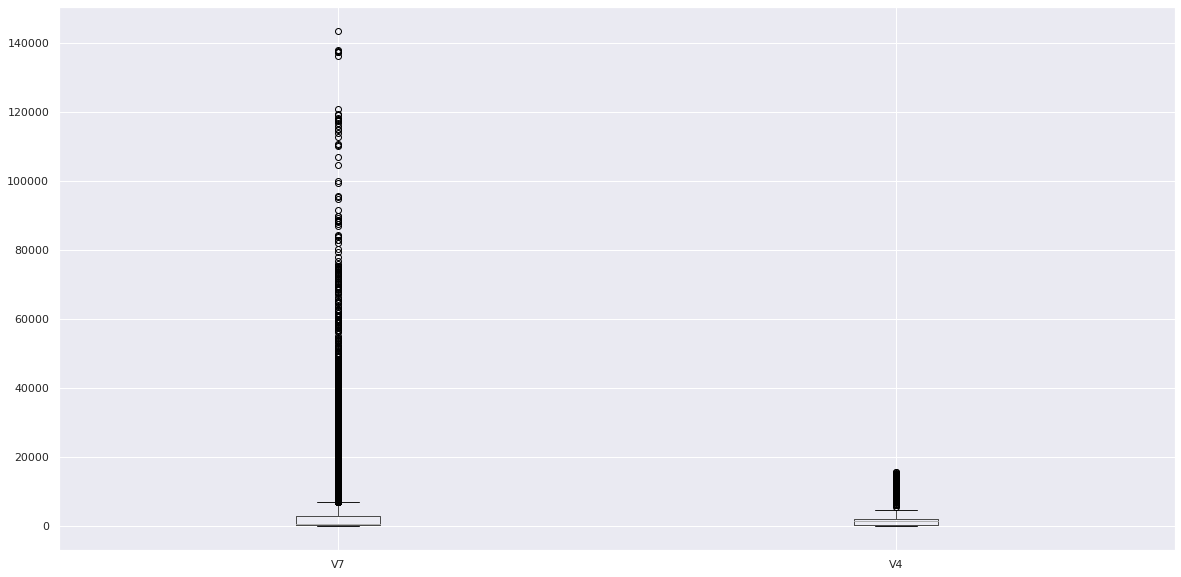

In [0]:
df_crop[['V7','V4']].boxplot(figsize=(20,10))

In [9]:
(df_crop.V7<20000).value_counts()

True     10561
False      608
Name: V7, dtype: int64

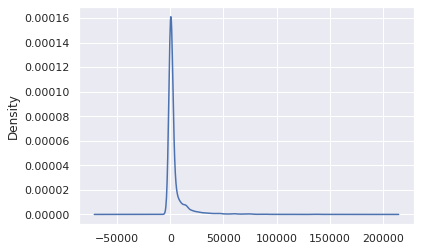

In [2]:
df_crop.V7.plot(kind='kde')

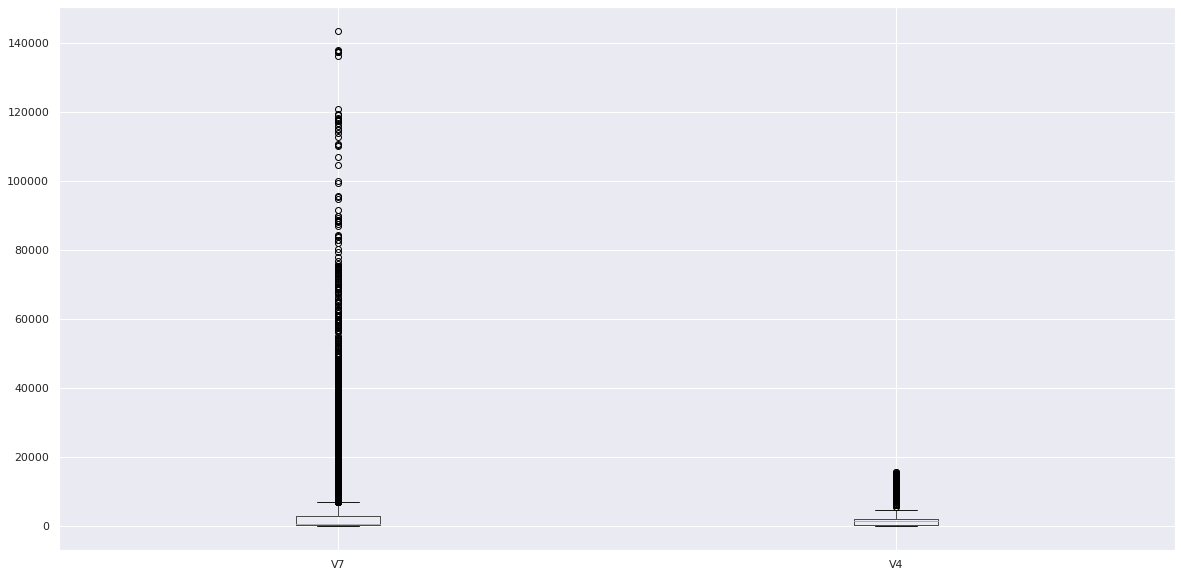

In [0]:
df_crop[['V7','V4']].boxplot(figsize=(20,10))

In [0]:
df_crop.V4.value_counts()

0        2199
1         101
1997       90
4          64
581        60
         ... 
10229       1
6070        1
2068        1
37          1
1157        1
Name: V4, Length: 1864, dtype: int64

In [0]:
df_crop.V4.max()

15616

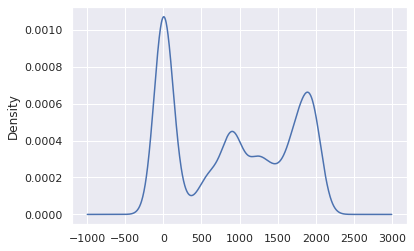

In [0]:
df_crop[df_crop.V4<2000].V4.plot(kind='kde')

In [0]:
df_crop.V7.value_counts()

1,736.3     26
588.5       20
13.2        18
1,715.7     18
14,724.8    17
            ..
48.1         1
13,760.3     1
6,350.0      1
86.4         1
287.4        1
Name: V7, Length: 9066, dtype: int64

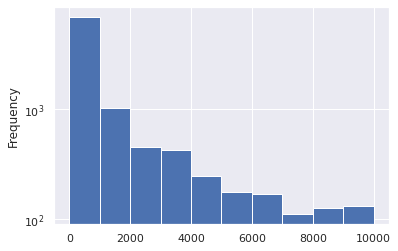

In [0]:
df_crop[df_crop.V7<10000].V7.plot(kind='hist', logy=True)

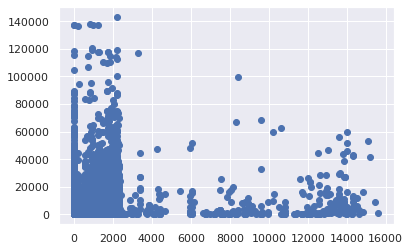

In [0]:
plt.scatter(df_crop.V4,df_crop.V7)

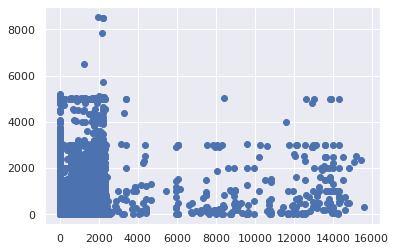

In [0]:
plt.scatter(df_crop.V4,df_crop.V3)

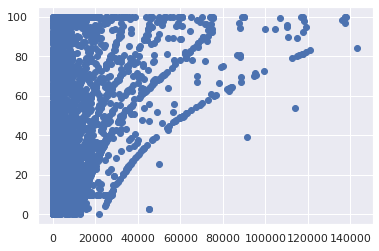

In [0]:
plt.scatter(df_crop.V7,df_crop.V2)

plt.show()

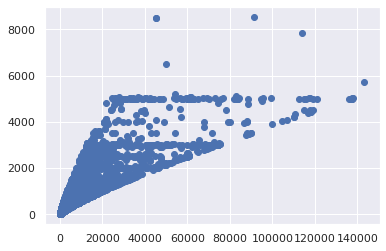

In [0]:
plt.scatter(df_crop.V7,df_crop.V3)

plt.show()

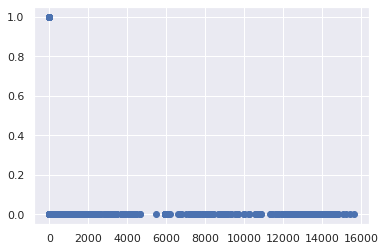

In [0]:
plt.scatter(df_crop.V4,df_crop.V6)

In [0]:
df_crop.V6.value_counts()

0    9182
1    1987
Name: V6, dtype: int64

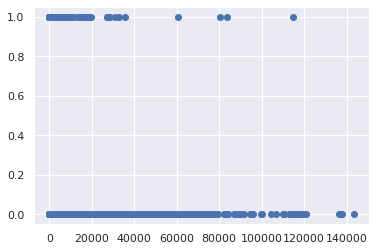

In [0]:
plt.scatter(df_crop.V7,df_crop.TARGET)

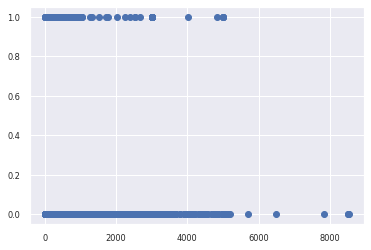

In [0]:
plt.scatter(df_crop.V3,df_crop.TARGET)

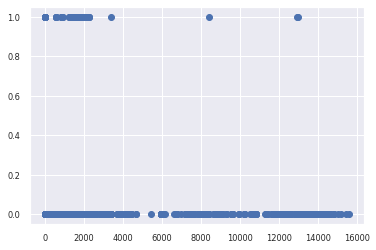

In [0]:
plt.scatter(df_crop.V4,df_crop.TARGET)

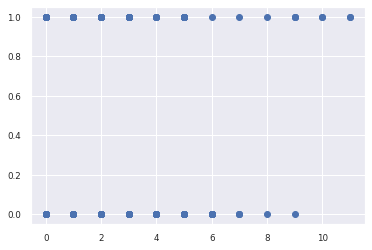

In [0]:
plt.scatter(df_crop.V5,df_crop.TARGET)

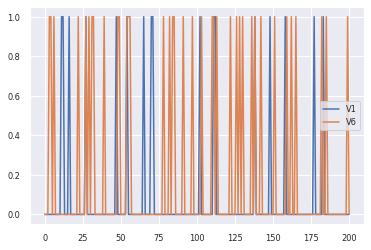

In [0]:
df_crop.loc[0:200,['V1','V6']].plot(kind='line')
plt.show()

In [0]:
from sklearn import preprocessing
df = df_crop[df_crop.Mes== 3]
print(df)
x = df[['V3','V2','V7']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.loc[0:100].plot(kind='bar', figsize=(20,5))
df.plot(kind='kde', figsize=(20,5))

plt.show()

AttributeError: ignored

In [0]:
df.describe()

,0,1,2,3
count,"11,169.000","11,169.000","11,169.000","11,169.000"
mean,0.197,0.062,0.089,0.030
std,0.254,0.106,0.111,0.081
min,0.000,0.000,0.000,0.000
25%,0.028,0.004,0.002,0.001
50%,0.100,0.016,0.085,0.003
75%,0.252,0.061,0.127,0.020
max,1.000,1.000,1.000,1.000


In [0]:
df_crop = pd.read_csv('dataset_test_ds.csv',delimiter=';')
#df_crop['Safra1'] = df_crop.Safra.astype(str) + '01'


df_crop['Mes'] = pd.DatetimeIndex(pd.to_datetime((df_crop.Safra.astype(str) + '01'), format='%%mY%d')).month.astype(int)


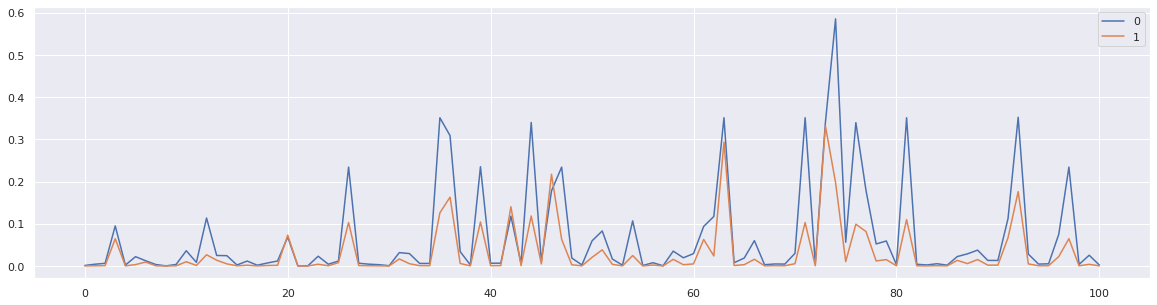

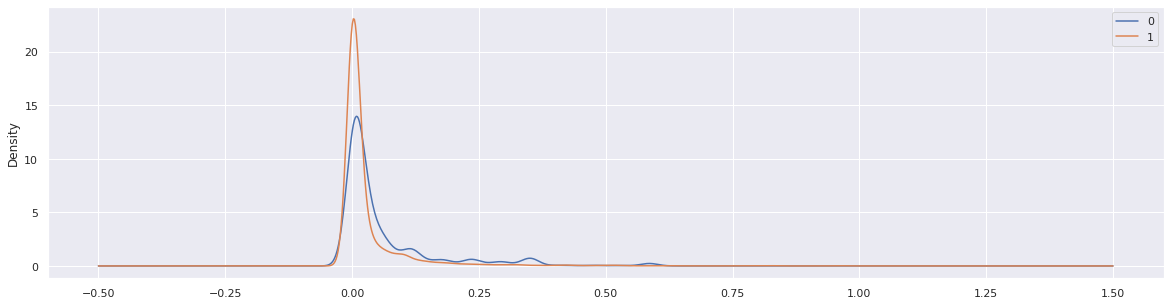

In [0]:
from sklearn import preprocessing
df2 = df_crop

x = df2[['V3','V7']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df2 = pd.DataFrame(x_scaled)
df2.loc[0:100].plot(kind='line', figsize=(20,5))
df2.plot(kind='kde', figsize=(20,5))

plt.show()

In [0]:
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11169 entries, 0 to 11168
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      11169 non-null  int64  
 1   V2      11169 non-null  float64
 2   V3      11169 non-null  float64
 3   TARGET  11169 non-null  int64  
 4   V4      11169 non-null  int64  
 5   V5      11169 non-null  int64  
 6   V6      11169 non-null  int64  
 7   V7      11169 non-null  float64
 8   V8      11169 non-null  int64  
 9   V9      11169 non-null  int64  
 10  V10     11169 non-null  int64  
 11  Safra   11169 non-null  int64  
 12  Mes     11169 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


In [0]:
df_crop

,V1,V2,V3,TARGET,V4,V5,V6,V7,V8,V9,V10,Safra,Mes
0,0,8.100,9.990,0,1968,0,0,15.150,0,0,0,201901,1
1,0,4.400,35.000,0,1369,0,0,63.980,1,0,0,201910,10
2,0,0.700,52.990,0,1228,0,0,98.840,0,0,0,201906,6
3,0,63.300,810.000,0,0,0,1,"9,237.210",0,0,0,201910,10
4,0,4.100,17.500,0,0,0,1,27.700,1,0,0,201902,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11164,0,86.400,5.000,0,1964,0,0,31.570,1,0,0,201909,9
11165,0,6.700,55.000,0,0,0,1,114.510,0,0,0,201909,9
11166,0,1.200,100.000,0,1120,0,0,213.570,1,0,0,201901,1
11167,0,11.000,85.000,0,2005,0,0,208.330,0,0,0,201911,11


In [0]:
df = df_crop.drop(columns='Safra')

In [0]:
df


,V1,V2,V3,TARGET,V4,V5,V6,V7,V8,V9,V10,Mes
0,0,8.100,9.990,0,1968,0,0,15.150,0,0,0,1
1,0,4.400,35.000,0,1369,0,0,63.980,1,0,0,10
2,0,0.700,52.990,0,1228,0,0,98.840,0,0,0,6
3,0,63.300,810.000,0,0,0,1,"9,237.210",0,0,0,10
4,0,4.100,17.500,0,0,0,1,27.700,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
11164,0,86.400,5.000,0,1964,0,0,31.570,1,0,0,9
11165,0,6.700,55.000,0,0,0,1,114.510,0,0,0,9
11166,0,1.200,100.000,0,1120,0,0,213.570,1,0,0,1
11167,0,11.000,85.000,0,2005,0,0,208.330,0,0,0,11


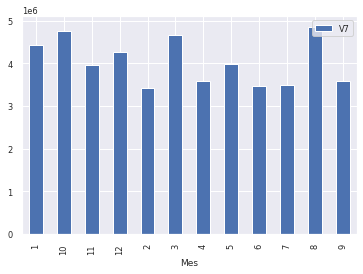

In [0]:
df[['Mes','V7']].groupby(by=['Mes']).sum().sort_values(by='Mes').plot(kind='bar')


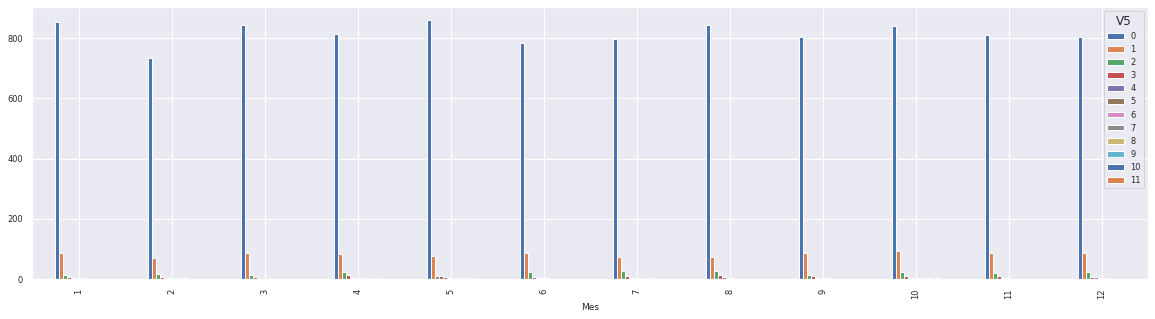

In [0]:
df_crop = pd.read_csv('dataset_test_ds.csv',delimiter=';')



df_crop['Mes'] = pd.DatetimeIndex(pd.to_datetime((df_crop.Safra.astype(str) + '01'), format='%Y%m%d')).month.astype(int)

df = df_crop.drop(columns='Safra')
#df1 = df[['Mes','V5']].groupby(by=['Mes', 'V5']).sum()
df1 = df.groupby(by=['Mes', 'V5']).size().unstack().fillna(0).astype(int)

df1.plot(kind='bar', figsize=(20,5))

In [0]:
df1

V5,0,1,2,3,4,5,6,7,8,9,10,11
Mes,,,,,,,,,,,,
1,854,87,12,6,2,1,0,1,0,0,0,0
2,735,68,17,5,2,2,0,0,1,1,0,0
3,845,86,13,6,2,0,0,0,0,0,0,0
4,814,84,22,11,3,2,1,1,0,0,2,0
5,861,75,8,9,5,1,0,0,1,1,0,1
6,785,87,21,7,4,2,1,0,0,0,0,0
7,798,73,26,8,1,3,1,0,0,1,0,0
8,844,73,25,11,5,2,2,0,0,0,0,0
9,803,85,13,8,1,1,1,1,0,0,0,0


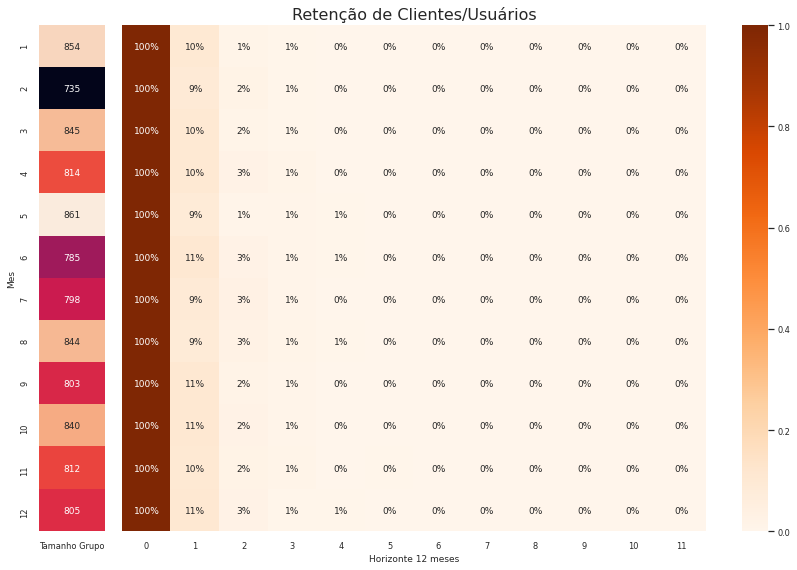

In [0]:

cohort_pivot = df1

cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

with sns.axes_style("dark"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='Oranges', 
                ax=ax[1])
    ax[1].set_title('Retenção de Clientes/Usuários', fontsize=16)
    ax[1].set(xlabel='Horizonte 12 meses',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'Tamanho Grupo'})
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                color='white', 
                ax=ax[0])

    fig.tight_layout()

In [0]:
df_crop.corr()

,V1,V2,V3,TARGET,V4,V5,V6,V7,V8,V9,V10,Safra,Mes
V1,1.000,-0.132,0.113,0.040,0.012,0.073,0.052,-0.023,-0.141,0.028,0.006,0.005,0.005
V2,-0.132,1.000,0.288,0.060,0.043,0.013,0.015,0.494,-0.118,0.011,0.051,-0.006,-0.006
V3,0.113,0.288,1.000,0.058,0.110,0.071,-0.033,0.806,-0.258,0.023,0.068,0.009,0.009
TARGET,0.040,0.060,0.058,1.000,-0.010,0.277,0.063,0.043,-0.056,0.057,0.052,-0.001,-0.001
V4,0.012,0.043,0.110,-0.010,1.000,0.011,-0.374,0.075,-0.049,0.021,0.080,0.014,0.014
V5,0.073,0.013,0.071,0.277,0.011,1.000,0.042,0.025,-0.193,0.034,0.073,0.017,0.017
V6,0.052,0.015,-0.033,0.063,-0.374,0.042,1.000,-0.018,0.019,-0.002,-0.013,0.005,0.005
V7,-0.023,0.494,0.806,0.043,0.075,0.025,-0.018,1.000,-0.178,0.022,0.080,0.005,0.005
V8,-0.141,-0.118,-0.258,-0.056,-0.049,-0.193,0.019,-0.178,1.000,-0.039,-0.039,-0.013,-0.013
V9,0.028,0.011,0.023,0.057,0.021,0.034,-0.002,0.022,-0.039,1.000,0.018,-0.010,-0.010


           V1     V2     V3  TARGET     V4  ...     V8     V9    V10  Safra    Mes
V1      1.000 -0.132  0.113   0.040  0.012  ... -0.141  0.028  0.006  0.005  0.005
V2     -0.132  1.000  0.288   0.060  0.043  ... -0.118  0.011  0.051 -0.006 -0.006
V3      0.113  0.288  1.000   0.058  0.110  ... -0.258  0.023  0.068  0.009  0.009
TARGET  0.040  0.060  0.058   1.000 -0.010  ... -0.056  0.057  0.052 -0.001 -0.001
V4      0.012  0.043  0.110  -0.010  1.000  ... -0.049  0.021  0.080  0.014  0.014
V5      0.073  0.013  0.071   0.277  0.011  ... -0.193  0.034  0.073  0.017  0.017
V6      0.052  0.015 -0.033   0.063 -0.374  ...  0.019 -0.002 -0.013  0.005  0.005
V7     -0.023  0.494  0.806   0.043  0.075  ... -0.178  0.022  0.080  0.005  0.005
V8     -0.141 -0.118 -0.258  -0.056 -0.049  ...  1.000 -0.039 -0.039 -0.013 -0.013
V9      0.028  0.011  0.023   0.057  0.021  ... -0.039  1.000  0.018 -0.010 -0.010
V10     0.006  0.051  0.068   0.052  0.080  ... -0.039  0.018  1.000  0.008  0.008
Safr

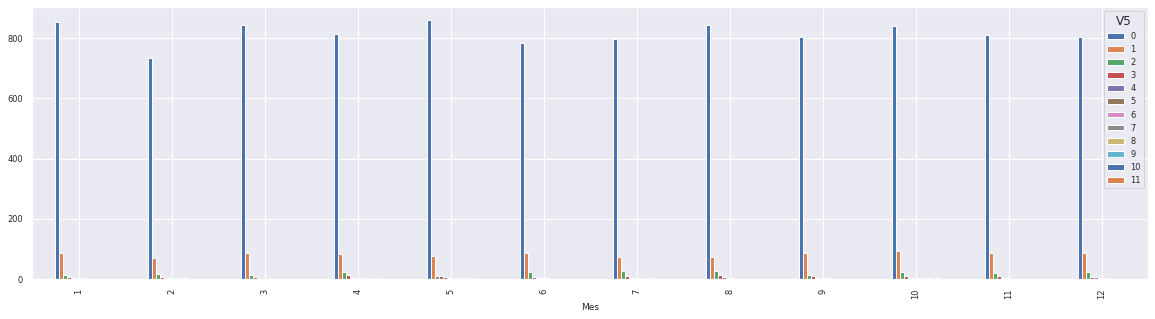

   VAR_NAME   MIN_VALUE   MAX_VALUE  ...  DIST_NON_EVENT    WOE    IV
0        V1       0.000       0.000  ...           0.895 -0.144 0.109
1        V1       1.000       1.000  ...           0.105  0.761 0.109
2        V2       0.000       4.700  ...           0.337 -0.705 0.160
3        V2       4.800      16.000  ...           0.331  0.211 0.160
4        V2      16.100     100.000  ...           0.332  0.247 0.160
5        V3       0.000      37.520  ...           0.252 -1.106 0.413
6        V3      37.600     135.000  ...           0.252 -0.635 0.413
7        V3     135.050     520.000  ...           0.250  0.262 0.413
8        V3     520.530   8,540.000  ...           0.246  0.621 0.413
9        V4       0.000     820.000  ...           0.332  0.341 0.077
10       V4     822.000   1,905.000  ...           0.334 -0.195 0.077
11       V4   1,906.000  15,616.000  ...           0.334 -0.256 0.077
12       V5       0.000       1.000  ...           0.969 -0.465 1.081
13       V5       2.

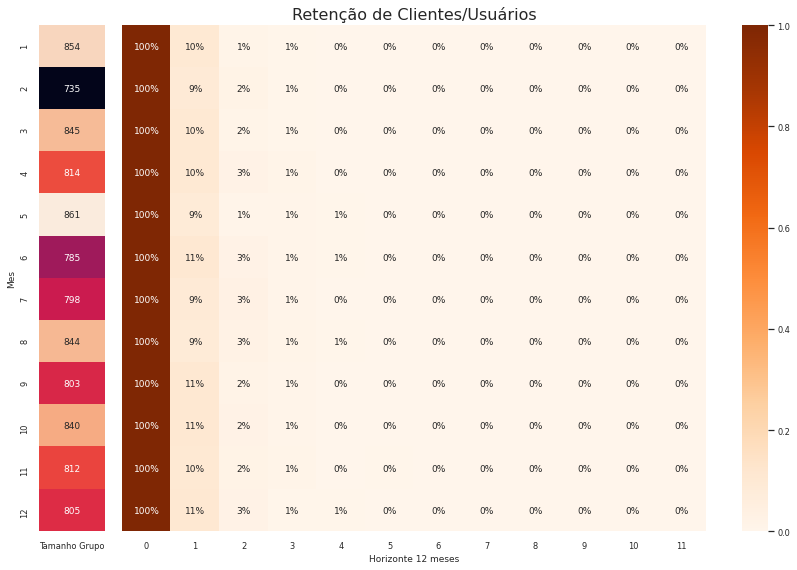

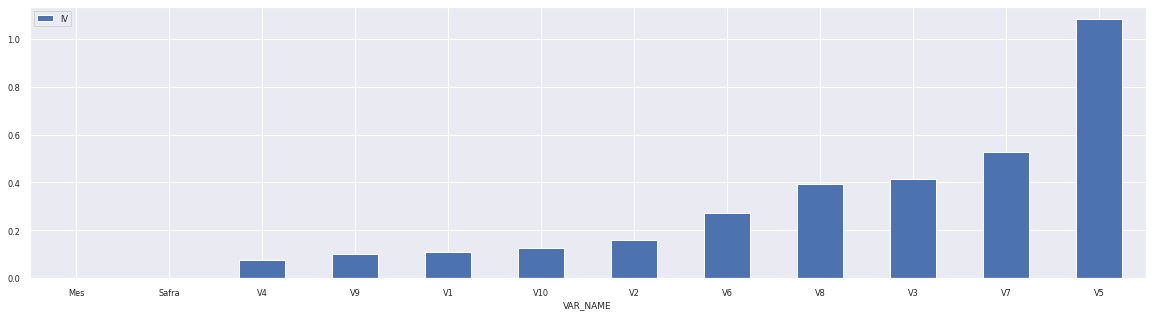

In [0]:

#####  PGM Princiapl

import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE 


df_crop = pd.read_csv('dataset_test_ds.csv',delimiter=';')

df_crop['Mes'] = pd.DatetimeIndex(pd.to_datetime((df_crop.Safra.astype(str) + '01'), format='%Y%m%d')).month.astype(int)
# Correlação de Pearson
print(df_crop.corr())

# Análise de cohort

df = df_crop

df1 = df.groupby(by=['Mes', 'V5']).size().unstack().fillna(0).astype(int)

df1.plot(kind='bar', figsize=(20,5))
plt.show()

cohort_pivot = df1

cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

with sns.axes_style("dark"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='Oranges', 
                ax=ax[1])
    ax[1].set_title('Retenção de Clientes/Usuários', fontsize=16)
    ax[1].set(xlabel='Horizonte 12 meses',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'Tamanho Grupo'})
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                color='white', 
                ax=ax[0])

    fig.tight_layout()

# Achar melhores variáveis com WoE

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

final_iv, IV = data_vars(df_crop, df_crop.TARGET)

print(final_iv)

candidatas = IV.sort_values('IV')
candidatas.plot(x='VAR_NAME',y='IV', kind='bar',figsize=(20,5), rot=0)

MelhoresCandidatas =  pd.DataFrame(data=None, columns=['Predição', 'Variáveis'])
tipos = ['Inútil','Fraco','Médio','Forte','Demais']
candidatas['Classe'] = ((candidatas.IV) <  0.02)*0 + (((candidatas.IV)>= 0.02) & ((candidatas.IV) <  0.1))*1 + (((candidatas.IV)>= 0.1) & ((candidatas.IV) <  0.3))*2 + (((candidatas.IV)>= 0.3) & ((candidatas.IV) <  0.5))*3 + ((candidatas.IV)>= 0.5)*4
trows=0
for x in candidatas.Classe.unique():
  new = [tipos[x],candidatas[candidatas.Classe == x].VAR_NAME.values]
  MelhoresCandidatas.loc[trows]= new
  trows += 1

# Preparar para Machine Learning

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE 

colunas = MelhoresCandidatas[MelhoresCandidatas.Predição.isin(['Médio','Forte'])].Variáveis
lista =[colunas[2], colunas[3]]
cols = np.concatenate(lista)
X_train = df_crop[cols]
y_train = df_crop.TARGET
nr = NearMiss(return_indices=True)
X_train, y_train, indices = nr.fit_sample(X_train, y_train)
df_X = pd.DataFrame(data=X_train, columns = cols)
X_train = df_X






In [0]:

candidatas = IV.sort_values('IV')
candidatas.plot(x='VAR_NAME',y='IV', kind='bar',figsize=(20,5), rot=0)

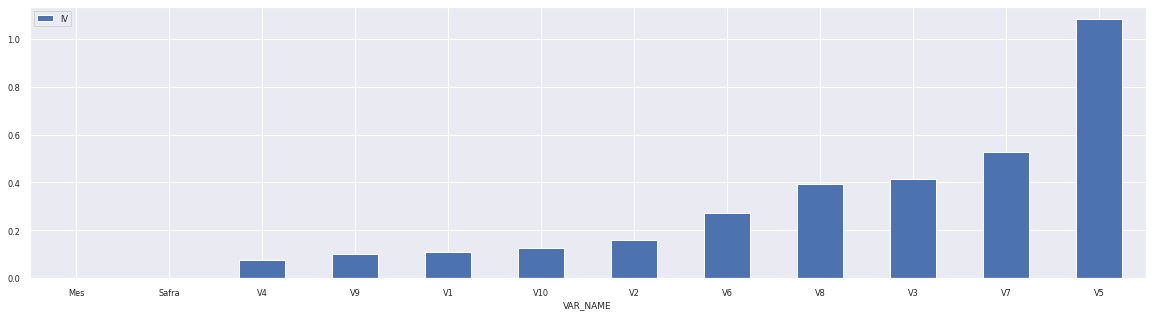

In [0]:
candidatas.plot(x='VAR_NAME',y='IV', kind='bar',figsize=(20,5), rot=0)

In [0]:
candidatas

,VAR_NAME,IV
0,Mes,0.001
1,Safra,0.001
6,V4,0.077
11,V9,0.103
2,V1,0.109
3,V10,0.128
4,V2,0.160
8,V6,0.274
10,V8,0.392
5,V3,0.413


In [0]:
MelhoresCandidatas =  pd.DataFrame(data=None, columns=['Predição', 'Variáveis'])
tipos = ['Inútil','Fraco','Médio','Forte','Demais']
candidatas['Classe'] = ((candidatas.IV) <  0.02)*0 + (((candidatas.IV)>= 0.02) & ((candidatas.IV) <  0.1))*1 + (((candidatas.IV)>= 0.1) & ((candidatas.IV) <  0.3))*2 + (((candidatas.IV)>= 0.3) & ((candidatas.IV) <  0.5))*3 + ((candidatas.IV)>= 0.5)*4
trows=0
for x in candidatas.Classe.unique():
  new = [tipos[x],candidatas[candidatas.Classe == x].VAR_NAME.values]
  MelhoresCandidatas.loc[trows]= new
  trows += 1

# Preparar para Machine Learning

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE 

colunas = MelhoresCandidatas[MelhoresCandidatas.Predição.isin(['Médio','Forte'])].Variáveis
lista =[colunas[2], colunas[3]]
cols = np.concatenate(lista)
X_train = df_crop[cols]
y_train = df_crop.TARGET
nr = NearMiss(return_indices=True)
X_train, y_train, indices = nr.fit_sample(X_train, y_train)
df_X = pd.DataFrame(data=X_train, columns = cols)
X_train = df_X




In [0]:
MelhoresCandidatas

,Predição,Variáveis
0,Inútil,"[Mes, Safra]"
1,Fraco,[V4]
2,Médio,"[V9, V1, V10, V2, V6]"
3,Forte,"[V8, V3]"
4,Demais,"[V7, V5]"


In [0]:
candidatas[candidatas.Classe == 0].VAR_NAME.values

array(['Mes', 'Safra'], dtype=object)

In [0]:
df_crop.TARGET.value_counts()

0    11049
1      120
Name: TARGET, dtype: int64

In [0]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE 

colunas = MelhoresCandidatas[MelhoresCandidatas.Predição.isin(['Médio','Forte'])].Variáveis
lista =[colunas[2], colunas[3]]
cols = np.concatenate(lista)
X_train = df_crop[cols]
y_train = df_crop.TARGET
nr = NearMiss(return_indices=True)
X_train, y_train, indices = nr.fit_sample(X_train, y_train)
df_X = pd.DataFrame(data=X_train, columns = cols)
X_train = df_X


In [0]:
df_X = pd.DataFrame(data=X_train, columns = cols)

In [0]:
df_X

,V9,V1,V10,V2,V6,V8,V3
0,0.000,0.000,0.000,9.200,0.000,0.000,"2,999.000"
1,0.000,0.000,0.000,8.900,0.000,0.000,"2,999.000"
2,0.000,0.000,0.000,8.800,0.000,0.000,"2,999.000"
3,0.000,0.000,0.000,8.600,0.000,0.000,"2,999.000"
4,0.000,0.000,0.000,8.500,0.000,0.000,"2,999.000"
...,...,...,...,...,...,...,...
235,0.000,0.000,0.000,12.600,1.000,0.000,13.920
236,0.000,1.000,0.000,10.000,1.000,0.000,"1,264.990"
237,0.000,0.000,0.000,100.000,0.000,0.000,155.000
238,0.000,0.000,0.000,0.400,0.000,0.000,244.110


In [0]:
colunas = MelhoresCandidatas[MelhoresCandidatas.Predição.isin(['Médio','Forte'])].Variáveis

In [0]:
colunas = MelhoresCandidatas[MelhoresCandidatas.Predição.isin(['Médio','Forte'])].Variáveis
lista =[colunas[2], colunas[3]]
cols = np.concatenate(lista)


In [0]:
cols

array(['V9', 'V1', 'V10', 'V2', 'V6', 'V8', 'V3'], dtype=object)

In [0]:
colunas

2    [V9, V1, V10, V2, V6]
3                 [V8, V3]
Name: Variáveis, dtype: object

In [0]:
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11169 entries, 0 to 11168
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      11169 non-null  int64  
 1   V2      11169 non-null  float64
 2   V3      11169 non-null  float64
 3   TARGET  11169 non-null  int64  
 4   V4      11169 non-null  int64  
 5   V5      11169 non-null  int64  
 6   V6      11169 non-null  int64  
 7   V7      11169 non-null  float64
 8   V8      11169 non-null  int64  
 9   V9      11169 non-null  int64  
 10  V10     11169 non-null  int64  
 11  Safra   11169 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.0 MB


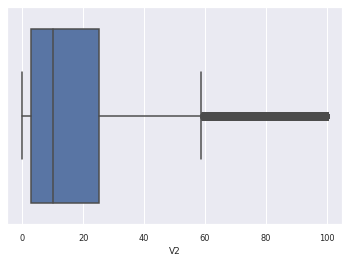

In [0]:
sns.boxplot(x=df_crop.V2)

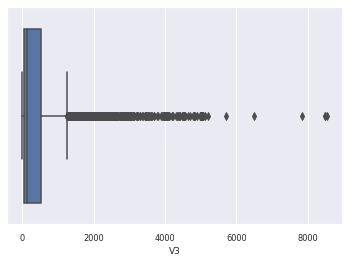

In [0]:
sns.boxplot(x=df_crop.V3)

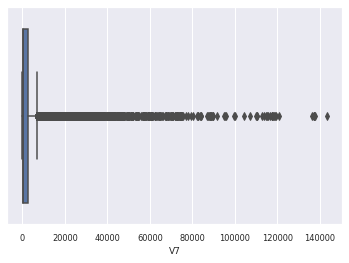

In [0]:
sns.boxplot(x=df_crop.V7)